# **Exploration and Predict "Category" News by Azhar** 

This project is to predict Real Dataset with another Dataset that have train category. So this project had 2 different dataset (Real Dataset and Train Dataset). In real dataset is having more information such as Customer Engagement and Date Time Post. The use of Train Dataset is for make Machine Learning Model to predict News Category using extract News Title Feature.

# ** Data Acquisition & Import Library**

In [102]:
#Data manipulation and transformation
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
sns.set_style("darkgrid")
plt.style.use("ggplot")

#Preprocessing Libary
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re
from sklearn.model_selection import train_test_split

#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [38]:
df = pd.read_csv("articles_data.csv")
df.head()

,Unnamed: 0,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
3,3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
4,4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0


# **Exploratory Data Analysis**

Checking missing value and observe the dataset information (Data Type, Column Name)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       10437 non-null  int64  
 1   source_id                        10437 non-null  object 
 2   source_name                      10437 non-null  object 
 3   author                           9417 non-null   object 
 4   title                            10435 non-null  object 
 5   description                      10413 non-null  object 
 6   url                              10436 non-null  object 
 7   url_to_image                     9781 non-null   object 
 8   published_at                     10436 non-null  object 
 9   content                          9145 non-null   object 
 10  top_article                      10435 non-null  float64
 11  engagement_reaction_count        10319 non-null  float64
 12  engagement_comment

In [41]:
df.isnull().sum()

id                                    0
source_id                             0
source_name                           0
author                             1020
title                                 2
description                          24
url                                   1
url_to_image                        656
published_at                          1
content                            1292
top_article                           2
engagement_reaction_count           118
engagement_comment_count            118
engagement_share_count              118
engagement_comment_plugin_count     118
dtype: int64

Visualize the most word counted in News Dataset (Real Dataset)

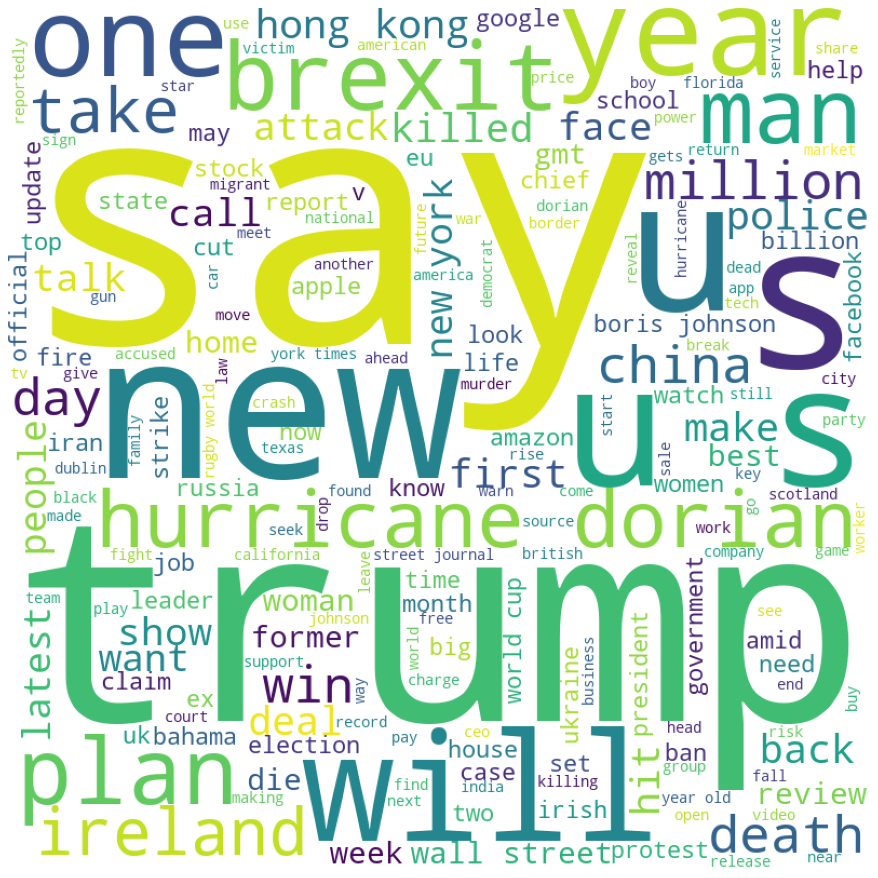

In [58]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.title:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


# **Data Preparation**

To Do:
- Rename the unnamed column
- Drop missing value who look like input error then fill missing value column with 0
- Drop Duplicated value
- Creating New Column (Column : weekday, published_hour, total_engagement)

In [40]:
df = df.rename(columns={"Unnamed: 0" : "id"})

In [42]:
df = df.drop(df[df["source_name"] == "460.0"].index)
df = df.drop(df[df["title"] == None].index)
df = df.fillna(value=0)

df['title'] = [str(item) for item in df['title']]

In [43]:
df.isnull().sum()

id                                 0
source_id                          0
source_name                        0
author                             0
title                              0
description                        0
url                                0
url_to_image                       0
published_at                       0
content                            0
top_article                        0
engagement_reaction_count          0
engagement_comment_count           0
engagement_share_count             0
engagement_comment_plugin_count    0
dtype: int64

In [51]:
df[df["title"].duplicated(keep=False)]

,id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count,weekday,published_hour,total_engagement
0,0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0,tuesday,16,2528.0
2,2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03,Louise Kennedy is showing off her autumn-winte...,1.0,0.0,0.0,0.0,0.0,tuesday,14,0.0
9,9,the-irish-times,The Irish Times,Pat Leahy,Boris Johnson to meet Leo Varadkar in Dublin o...,UK prime minister will meet Taoiseach for talk...,https://www.irishtimes.com/news/politics/boris...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03,The British Prime Minister Boris Johnson is to...,0.0,50.0,77.0,8.0,0.0,tuesday,15,135.0
24,24,reuters,Reuters,Brendan Pierson,Trial of actor Cuba Gooding Jr in groping case...,Judge Herbert Moses of the Manhattan Supreme C...,https://ca.reuters.com/article/entertainmentNe...,https://s3.reutersmedia.net/resources/r/?m=02&...,2019-09-03,NEW YORK (Reuters) - Judge Herbert Moses of th...,0.0,0.0,0.0,0.0,0.0,tuesday,15,0.0
32,32,reuters,Reuters,Reuters Editorial,Illinois joins lawsuit to ask court to stop me...,Illinois has joined a multistate lawsuit aimed...,https://www.reuters.com/article/sprint-ma-tmob...,https://s4.reutersmedia.net/resources_v2/image...,2019-09-03,"WASHINGTON, Sept 3 (Reuters) - Illinois has jo...",0.0,0.0,0.0,0.0,0.0,tuesday,17,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10411,10411,cbs-news,CBS News,CBS News,The Last Confession,A beauty queen is found murdered. The prime su...,https://www.cbsnews.com/video/the-last-confess...,https://cbsnews2.cbsistatic.com/hub/i/r/2018/0...,2019-10-03,0,0.0,0.0,0.0,0.0,0.0,thursday,16,0.0
10418,10418,reuters,Reuters,Reuters Editorial,Zverev and Tsitsipas roll into Beijing quarters,Second seed Alexander Zverev eased past Felix ...,https://ca.reuters.com/article/sportsNews/idCA...,https://s3.reutersmedia.net/resources/r/?m=02&...,2019-10-03,(Reuters) - Second seed Alexander Zverev eased...,0.0,0.0,0.0,0.0,0.0,thursday,15,0.0
10433,10433,reuters,Reuters,Sumeet Chatterjee,Banker defections pose challenge for Credit Su...,The announcement by Julius Baer this week that...,https://www.reuters.com/article/us-credit-suis...,https://s3.reutersmedia.net/resources/r/?m=02&...,2019-10-03,ZURICH/HONG KONG (Reuters) - The announcement ...,0.0,0.0,0.0,627.0,0.0,thursday,15,627.0
10435,10435,cbs-news,CBS News,CBS News,Fateful Connection,A detective is haunted by the case of two wome...,https://www.cbsnews.com/video/fateful-connecti...,https://cbsnews1.cbsistatic.com/hub/i/r/2019/1...,2019-10-03,0,0.0,0.0,0.0,0.0,0.0,thursday,16,0.0


In [52]:
df = df.drop_duplicates("title")

In [53]:
df.shape

(9810, 18)

In [45]:
df["weekday"] = pd.to_datetime(df["published_at"]).dt.weekday

day_map = {
    0 : "monday",
    1 : "tuesday",
    2 : "wednesday",
    3 : "thursday",
    4 : "friday",
    5 : "saturday",
    6 : "sunday",
}

df["weekday"] = df["weekday"].map(day_map)

In [46]:
df["weekday"].value_counts()

thursday     3234
tuesday      2409
friday       1566
saturday     1186
wednesday     772
monday        639
sunday        630
Name: weekday, dtype: int64

In [47]:
df["published_hour"] = pd.to_datetime(df["published_at"]).dt.hour
df["published_at"] = pd.to_datetime(df["published_at"]).dt.date
df["published_at"] = pd.to_datetime(df["published_at"])

In [49]:
df["total_engagement"] = df["engagement_reaction_count"] + df["engagement_comment_count"] + df["engagement_share_count"] + df["engagement_comment_plugin_count"]

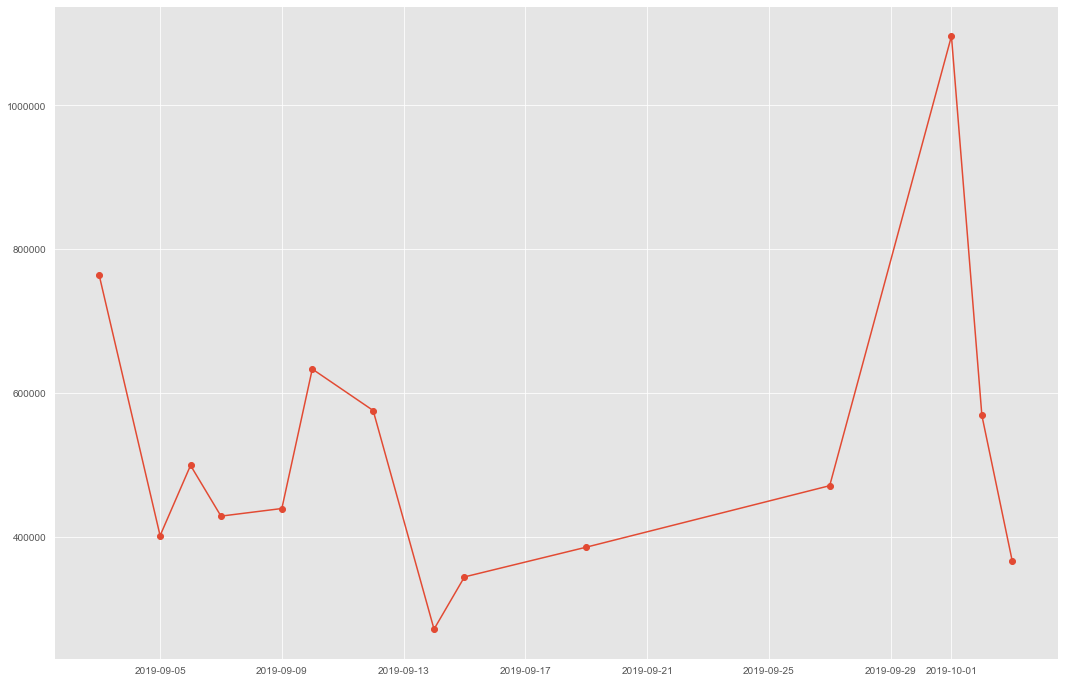

In [50]:
df_date_engg = pd.DataFrame({"date":df["published_at"], "total_engagement" : df["total_engagement"]})
df_date_engg = df_date_engg.groupby(by="date", as_index=False).sum()

fig = plt.figure(figsize=(18,12))
plt.ticklabel_format(style="plain", axis="y")
#sns.lineplot(x="date", y="total_engagement",markers=True, dashes=False,data=df_date_engg)
plt.plot(df_date_engg["date"],df_date_engg["total_engagement"], marker='o')
plt.show()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9810 entries, 0 to 10434
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               9810 non-null   int64         
 1   source_id                        9810 non-null   object        
 2   source_name                      9810 non-null   object        
 3   author                           9810 non-null   object        
 4   title                            9810 non-null   object        
 5   description                      9810 non-null   object        
 6   url                              9810 non-null   object        
 7   url_to_image                     9810 non-null   object        
 8   published_at                     9810 non-null   datetime64[ns]
 9   content                          9810 non-null   object        
 10  top_article                      9810 non-null   float64   

# **Train Category with Logistic Regression (Data Modelling)**

In [457]:
df_json = pd.read_json("News_Category_Dataset_v2.json", lines=True)
df_json.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [458]:
df_json["category"].value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

In [459]:
my_tags = ["POLITICS", "ENTERTAINMENT", "STYLE & BEAUTY", "BUSINESS", "SPORTS", "SCIENCE & TECH", "CRIME"]

def category_cleaner(x):
    
    if x == 'THE WORLDPOST':
        return 'WORLDPOST'
    elif x == 'PARENTING':
        return 'PARENTS'
    elif x == 'ARTS' or x == 'CULTURE & ARTS':
        return 'ARTS & CULTURE'
    elif x == 'STYLE':
        return 'STYLE & BEAUTY'
    elif x == 'COLLEGE':
        return 'EDUCATION'
    elif x == 'TASTE':
        return 'FOOD & DRINK'
    elif x == 'TECH' or x == 'SCIENCE':
        return 'SCIENCE & TECH'
    else:
        return x
    
df_json['category'] = df_json.category.apply(category_cleaner)


df_json = df_json.loc[df_json['category'].isin(my_tags)]
df_json['category'].value_counts()

POLITICS          32739
ENTERTAINMENT     16058
STYLE & BEAUTY    11903
BUSINESS           5937
SPORTS             4884
SCIENCE & TECH     4260
CRIME              3405
Name: category, dtype: int64

In [460]:
df_json["category"].value_counts()

POLITICS          32739
ENTERTAINMENT     16058
STYLE & BEAUTY    11903
BUSINESS           5937
SPORTS             4884
SCIENCE & TECH     4260
CRIME              3405
Name: category, dtype: int64

In [461]:
pol = df_json[df_json['category'] == "POLITICS"].sample(7000)
ent = df_json[df_json['category'] == "ENTERTAINMENT"].sample(6000)
sty = df_json[df_json['category'] == "STYLE & BEAUTY"].sample(6000)

In [462]:
df_json = df_json.drop(df_json[df_json['category'] == "POLITICS"].index)
df_json = df_json.drop(df_json[df_json['category'] == "ENTERTAINMENT"].index)
df_json = df_json.drop(df_json[df_json['category'] == "STYLE & BEAUTY"].index)

In [463]:
df_json = df_json.append(pol)
df_json = df_json.append(ent)
df_json = df_json.append(sty)

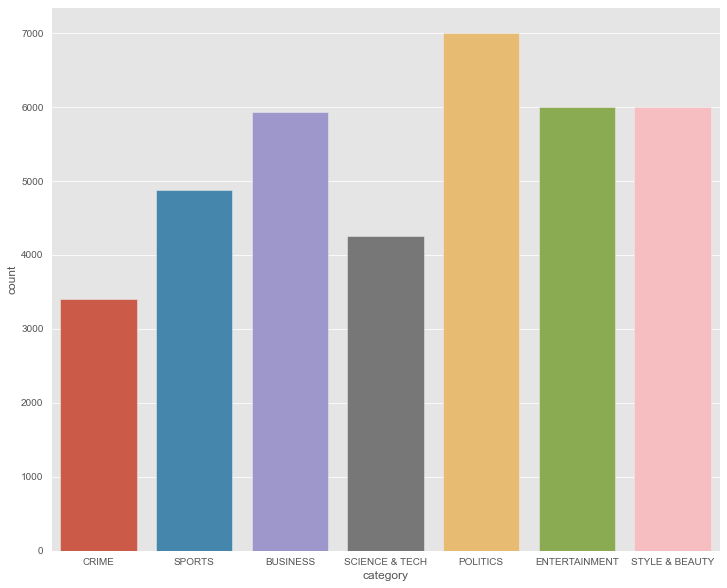

In [464]:
fig = plt.figure(figsize=(12,10))
sns.countplot(x="category", data=df_json)
plt.show()

In [465]:
df_json.sample(5)

,category,headline,authors,link,short_description,date
88744,BUSINESS,What the Big Airplane Decision Reveals About Y...,"Lisa Earle McLeod, ContributorCreator of Noble...",https://www.huffingtonpost.com/entry/what-the-...,There's a moment on every airplane when you ma...,2015-06-09
70301,SCIENCE & TECH,How Earth Changed In 2015: The View From Far A...,,https://www.huffingtonpost.com/entry/how-earth...,From raging forest fires to dwindling snowmelt...,2016-01-04
169791,STYLE & BEAUTY,"Celebrity Beauty Advice: Miranda Kerr, Alicia ...",,https://www.huffingtonpost.com/entry/celebrity...,Want Miranda Kerr's glowing skin? According to...,2012-12-28
114564,POLITICS,Legal 'Pussyrioting' Lives on in Another Russi...,"Innokenty (Kes) Grekov, ContributorRussia list...",https://www.huffingtonpost.com/entry/legal-pus...,The Hatchet may be on the opposite end of the ...,2014-08-16
3950,SCIENCE & TECH,Get Used To Nor'easters — Arctic Warming May M...,"Mindy Weisberger, Live Science",https://www.huffingtonpost.com/entry/get-used-...,As average temperatures rise across the planet...,2018-03-14


In [466]:
def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled
X_train, X_test, y_train, y_test = train_test_split(df_json.headline, df_json.category, random_state=42, test_size=0.2)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [467]:
all_data[:2]

[TaggedDocument(words=['How', 'To', 'Find', 'A', 'Company', 'That', 'Exceeds', 'Your', 'Wildest', 'Expectations'], tags=['Train_0']),
 TaggedDocument(words=['Two', 'Dead', 'After', 'Shooting', 'At', 'Oklahoma', 'City', 'Airport'], tags=['Train_1'])]

In [468]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])


for epoch in range(30):
    %time model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 37486/37486 [00:00<00:00, 2499009.47it/s]Wall time: 1.98 s

100%|██████████| 37486/37486 [00:00<00:00, 3123625.31it/s]Wall time: 2.01 s

100%|██████████| 37486/37486 [00:00<00:00, 3407622.01it/s]Wall time: 3.11 s

100%|██████████| 37486/37486 [00:00<00:00, 2884329.40it/s]Wall time: 2 s

100%|██████████| 37486/37486 [00:00<00:00, 3123749.42it/s]Wall time: 3.1 s

100%|██████████| 37486/37486 [00:00<00:00, 3750481.36it/s]Wall time: 2.01 s

100%|██████████| 37486/37486 [00:00<00:00, 3407031.29it/s]Wall time: 3.08 s

100%|██████████| 37486/37486 [00:00<00:00, 3409617.24it/s]Wall time: 2.02 s

100%|██████████| 37486/37486 [00:00<00:00, 2498652.04it/s]Wall time: 3.08 s

100%|██████████| 37486/37486 [00:00<00:00, 3750928.73it/s]Wall time: 2.02 s

100%|██████████| 37486/37486 [00:00<00:00, 4141166.80it/s]Wall time: 3.08 s

100%|██████████| 37486/37486 [00:00<00:00, 2677811.12it/s]Wall time: 2.01 s

100%|██████████| 37486/37486 [00:00<00:00, 2884541.06it/s]Wall time: 3.08 s

100

In [469]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

<ipython-input-469-81a54864760a>:13: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  vectors[i] = model.docvecs[prefix]


In [470]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
#logreg.fit(train_vectors_dbow, y_train)
%time logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

C:\Users\AZHAR IE\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Wall time: 4.63 s
accuracy 0.7176580421445719
                precision    recall  f1-score   support

      POLITICS       0.63      0.67      0.65      1153
 ENTERTAINMENT       0.74      0.77      0.75       677
STYLE & BEAUTY       0.68      0.72      0.70      1175
      BUSINESS       0.75      0.75      0.75      1466
        SPORTS       0.67      0.58      0.62       853
SCIENCE & TECH       0.78      0.71      0.74       982
         CRIME       0.79      0

# **Prediction To Real Data**

In [492]:
def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled
#X_train, X_test, y_train, y_test = train_test_split(df_coba.post, df_coba.tags, random_state=0, test_size=0.3)
#X_train = label_sentences(X_train, 'Train')
X_test = df.title
X_test = label_sentences(X_test, 'Test')
all_data = X_test

In [512]:
all_data[:3]

[TaggedDocument(words=['NTSB', 'says', 'Autopilot', 'engaged', 'in', '2018', 'California', 'Tesla', 'crash'], tags=['Test_0']),
 TaggedDocument(words=['Unemployment', 'falls', 'to', 'post-crash', 'low', 'of', '5.2%'], tags=['Test_1']),
 TaggedDocument(words=['Louise', 'Kennedy', 'AW2019:', 'Long', 'coats,', 'sparkling', 'tweed', 'dresses', 'and', 'emerald', 'knits'], tags=['Test_2'])]

In [494]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 9810/9810 [00:00<00:00, 1227656.11it/s]


In [503]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

<ipython-input-503-d3b55e82f560>:13: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  vectors[i] = model.docvecs[prefix]


In [504]:
y_pred_2 = logreg.predict(test_vectors_dbow)

In [505]:
df['category'] = y_pred_2

In [506]:
df.head(5)

,id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count,weekday,published_hour,total_engagement,category
0,0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0,tuesday,16,2528.0,POLITICS
1,1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0,tuesday,10,18.0,SCIENCE & TECH
2,2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03,Louise Kennedy is showing off her autumn-winte...,1.0,0.0,0.0,0.0,0.0,tuesday,14,0.0,BUSINESS
3,3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0,tuesday,17,7.0,BUSINESS
4,4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03,0,0.0,0.0,0.0,0.0,0.0,tuesday,14,0.0,BUSINESS


In [507]:
df[["title", "category"]]

,title,category
0,NTSB says Autopilot engaged in 2018 California...,POLITICS
1,Unemployment falls to post-crash low of 5.2%,SCIENCE & TECH
2,"Louise Kennedy AW2019: Long coats, sparkling t...",BUSINESS
3,North Korean footballer Han joins Italian gian...,BUSINESS
4,UK government lawyer says proroguing parliamen...,BUSINESS
...,...,...
10429,Picturing male breast cancer,POLITICS
10430,Walking Free,BUSINESS
10431,GOLDMAN SACHS: Buy these 11 stocks poised to s...,STYLE & BEAUTY
10432,Drop in US service sector activity raises econ...,POLITICS


In [508]:
df[df["category"] == 'POLITICS'].title.sample(20)

7290    Frenchman Nicolas Dupuis signs new deal as Mad...
4112    British peer loses tenancy of €20m Kilkenny ma...
349     Photos show the destruction Hurricane Dorian h...
9122      Bank fees around the U.S. climb to record highs
1966    WATCH: Hurricane Dorian makes landfall in Nort...
6820    Flooding caused by Imelda prompts hundreds of ...
6861       The Fed is cutting rates. Here's how to invest
3866    Dubliner to go on trial in New York for death ...
6932    Roku's even smaller Express and 4K-HDR Ultra c...
6194    Acting USCIS Director Ken Cuccinelli says Trum...
2956        Inside the life of master showman P.T. Barnum
5357                Five Cities: Living on $50K a Year...
5963    Egypt says no 'breakthrough' with Ethiopia ove...
8821    Making history mandatory will be popular - but...
7012    Trump closes doors to immigrants, some US citi...
9063    For rural Kenyans, treating snakebites is an u...
3275    China has piled up nearly 100 tons of gold res...
9119    A four

In [513]:
df['category'].value_counts()

POLITICS          2875
BUSINESS          2791
SCIENCE & TECH    1620
STYLE & BEAUTY    1244
SPORTS             904
ENTERTAINMENT      208
CRIME              168
Name: category, dtype: int64

In [514]:
df.to_csv("Internet_news_reader_engagement.csv",index=False)

In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9810 entries, 0 to 10434
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               9810 non-null   int64         
 1   source_id                        9810 non-null   object        
 2   source_name                      9810 non-null   object        
 3   author                           9810 non-null   object        
 4   title                            9810 non-null   object        
 5   description                      9810 non-null   object        
 6   url                              9810 non-null   object        
 7   url_to_image                     9810 non-null   object        
 8   published_at                     9810 non-null   datetime64[ns]
 9   content                          9810 non-null   object        
 10  top_article                      9810 non-null   float64   